In [1]:
from rome.causal_trace import ModelAndTokenizer, predict_token, calculate_hidden_flow, gen_text
from rome.causal_trace import plot_hidden_flow, plot_all_flow

%load_ext autoreload
%autoreload 2

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [15]:
mt = ModelAndTokenizer("openai-gpt") # "EleutherAI/gpt-j-6B"
# sshleifer/tiny-gpt2

Downloading:   0%|          | 0.00/656 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/797k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/448k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.21M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457M [00:00<?, ?B/s]

Some weights of OpenAIGPTLMHeadModel were not initialized from the model checkpoint at openai-gpt and are newly initialized: ['lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
total_params = sum(param.numel() for param in mt.model.parameters())
print(total_params)
# gpt2 124 439 808
# tiny-gpt2 102 714
# distilgpt2 81 912 576
# openai-gpt 116 534 784

116534784


In [12]:
test1 = predict_token(
    mt,
    ['Neil Armstrong was the first man on the'],
    return_p=True,
)
test2 = predict_token(
    mt,
    ['Barack Obama is the first african-american'],
    return_p=True,
)
print(test1, test2)

([' moon'], tensor([0.0938], device='cuda:0')) ([' president'], tensor([0.5285], device='cuda:0'))


In [13]:
res1 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
)
res2 = calculate_hidden_flow(
    mt,
    "Barack Obama is the first african-american",
    subject="Barack Obama",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
)
print(res1)
print(res2)

{'scores': tensor([[0.0917, 0.0917, 0.0917, 0.0984, 0.0977, 0.0975],
        [0.1157, 0.1247, 0.1238, 0.0899, 0.0802, 0.0963],
        [0.0880, 0.0878, 0.0889, 0.0926, 0.0920, 0.0949],
        [0.0927, 0.0931, 0.0932, 0.0981, 0.0942, 0.0967],
        [0.0912, 0.0907, 0.0909, 0.0881, 0.0928, 0.0971],
        [0.0902, 0.0831, 0.0839, 0.0922, 0.0927, 0.0941],
        [0.0944, 0.0911, 0.0919, 0.0898, 0.0949, 0.0965],
        [0.0892, 0.0781, 0.0700, 0.0684, 0.0691, 0.0820]]), 'low_score': 0.09722550958395004, 'high_score': tensor(0.0938, device='cuda:0'), 'input_ids': tensor([29354, 21166,   373,   262,   717,   582,   319,   262],
       device='cuda:0'), 'input_tokens': ['Neil', ' Armstrong', ' was', ' the', ' first', ' man', ' on', ' the'], 'subject_range': (0, 2), 'answer': ' moon', 'window': 5, 'correct_prediction': True, 'kind': 'mlp'}
{'scores': tensor([[0.4107, 0.4106, 0.4106, 0.3766, 0.3770, 0.3770],
        [0.3704, 0.3701, 0.3706, 0.3781, 0.3767, 0.3783],
        [0.4533, 0.4577

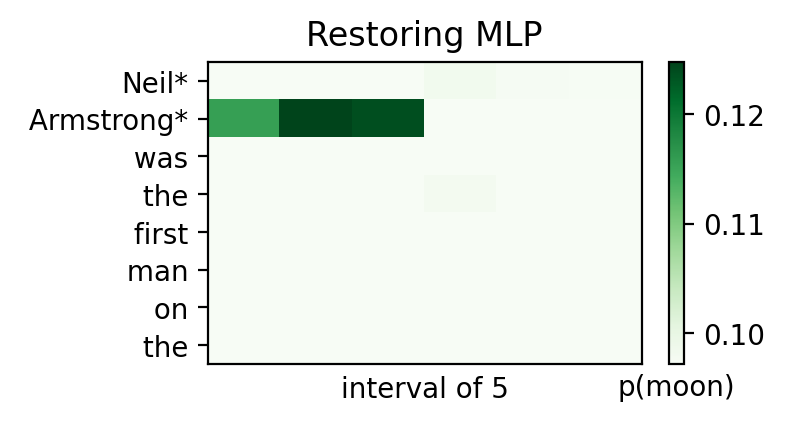

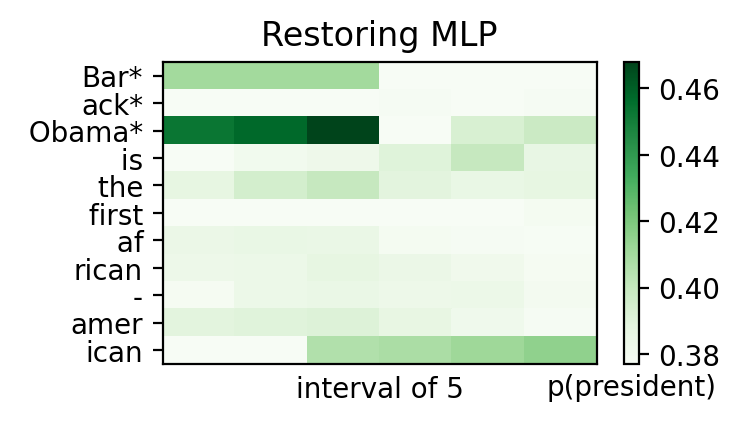

In [14]:
plot_hidden_flow(mt, "Neil Armstrong was the first man on the", kind="mlp", noise=0.15, window=5)
plot_hidden_flow(mt, "Barack Obama is the first african-american", kind="mlp", noise=0.15, window=5)

In [ ]:
res3 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
    expect="mars",
)
res4 = calculate_hidden_flow(
    mt,
    "Neil Armstrong was the first man on the",
    subject="Neil Armstrong",
    kind="mlp",
    noise=0.15,
    window=5,
    samples=10,
    expect="moon",
)
print(res3)
print(res4)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


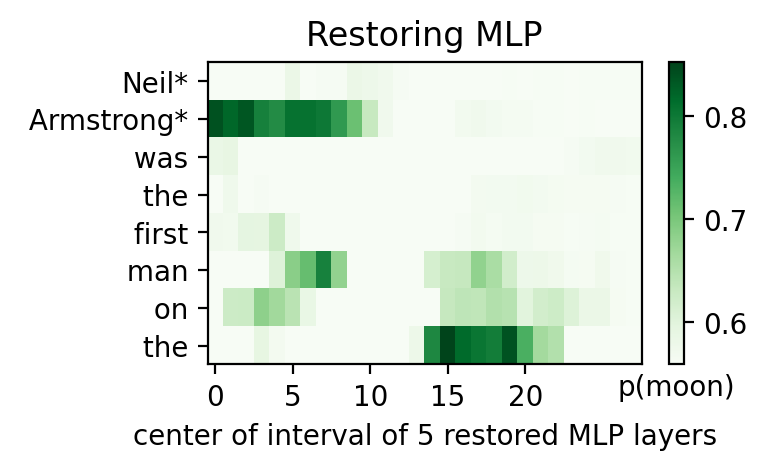

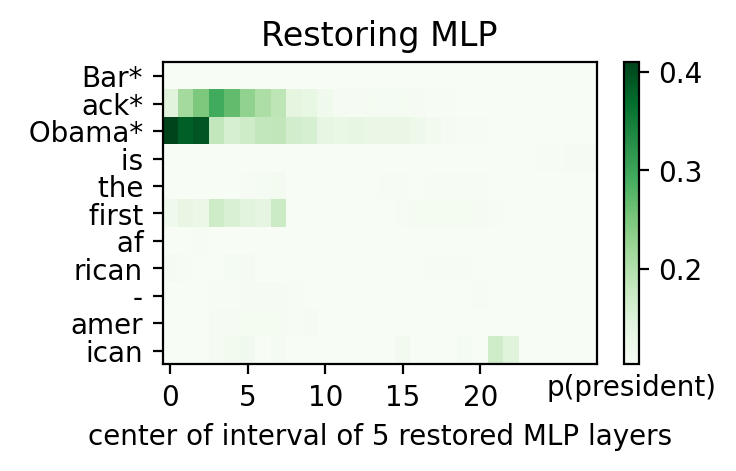

In [6]:
plot_hidden_flow(mt, "Neil Armstrong was the first man on the", kind="mlp", noise=0.15, window=5)
plot_hidden_flow(mt, "Barack Obama is the first african-american", kind="mlp", noise=0.15, window=5)

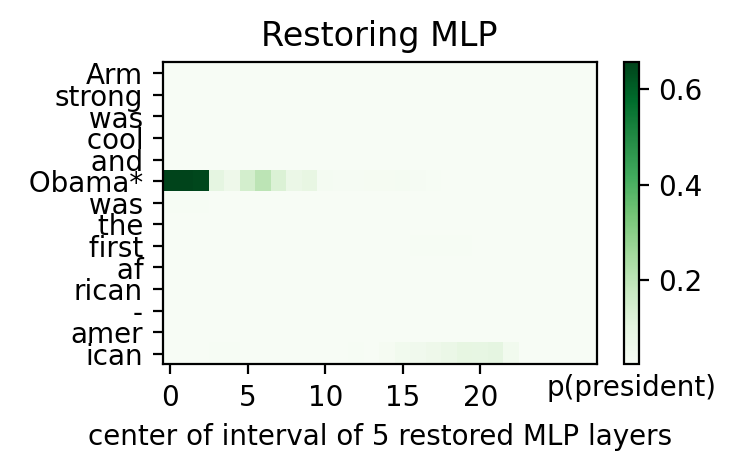

In [7]:
plot_hidden_flow(
    mt,
    "Armstrong was cool and Obama was the first african-american",
    subject="Obama",
    kind="mlp",
    noise=0.2,
    window=5,
)

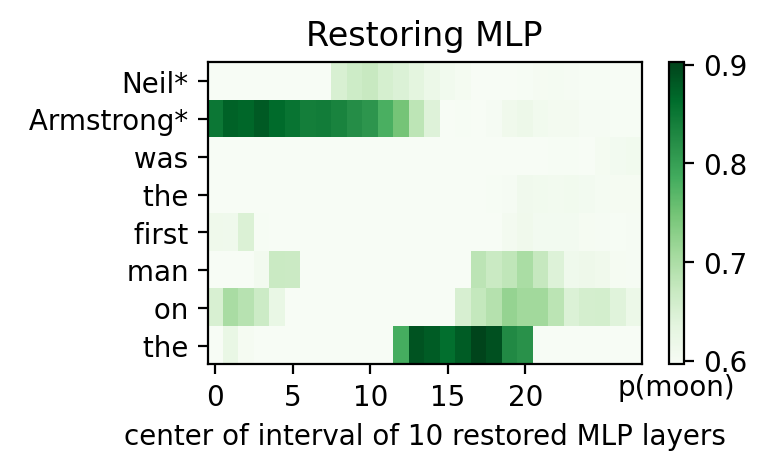

AttributeError: 'tuple' object has no attribute 'shape'

In [8]:
plot_all_flow(mt, "Neil Armstrong was the first man on the")

In [9]:
test_tox = predict_token(
    mt,
    ['Fuck you! You are such an'],
    return_p=True,
)
print(test_tox)

([' asshole'], tensor([0.3854], device='cuda:0'))


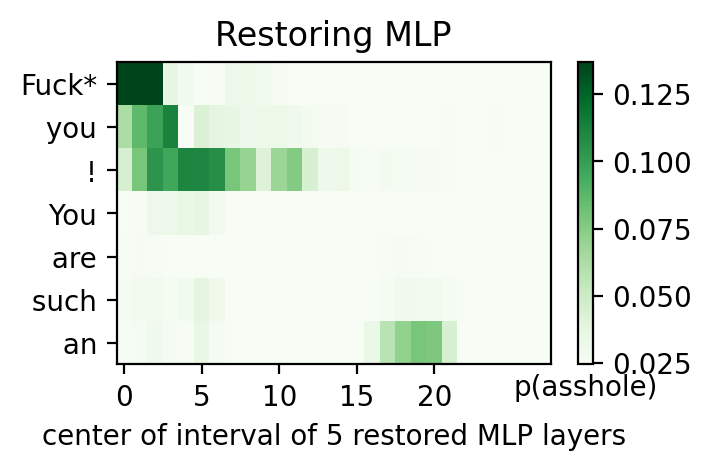

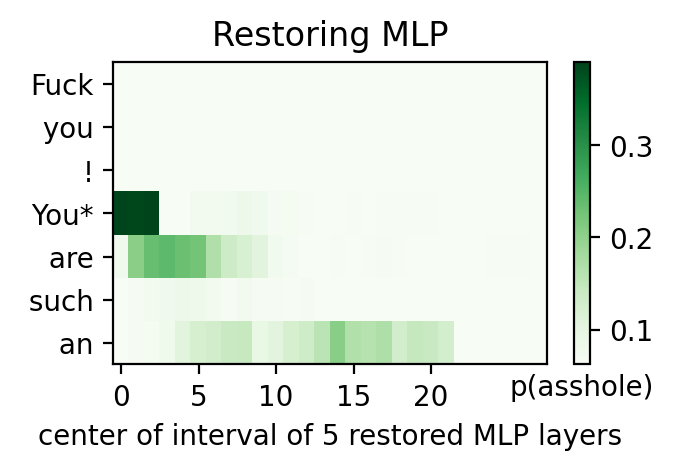

In [10]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
)

Some weights of the model checkpoint at SkolkovoInstitute/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


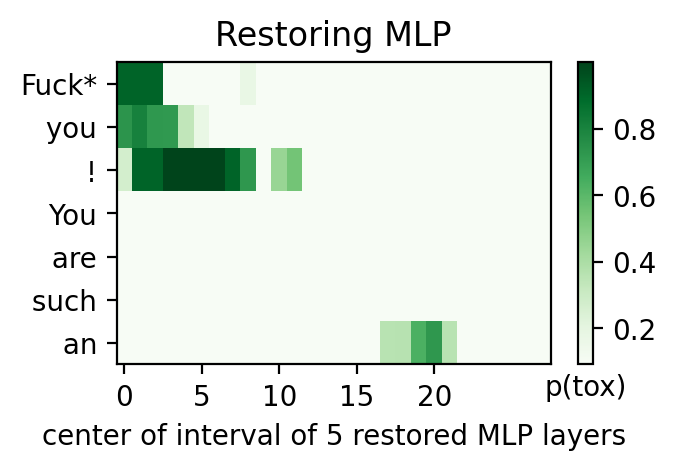

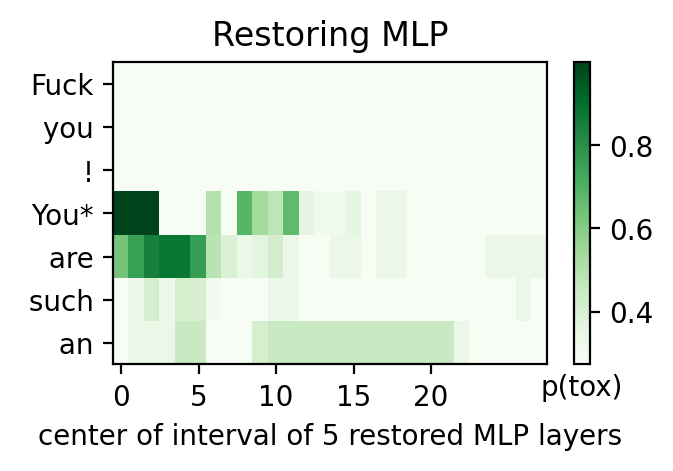

In [14]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

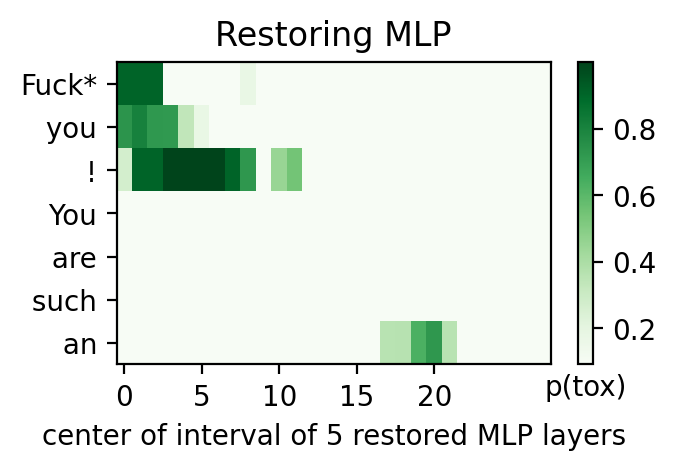

In [15]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

In [16]:
test_tox = predict_token(
    mt,
    ['Fuck you! You are such an'],
    return_p=True,
)
print(test_tox)

([' asshole'], tensor([0.3854], device='cuda:0'))


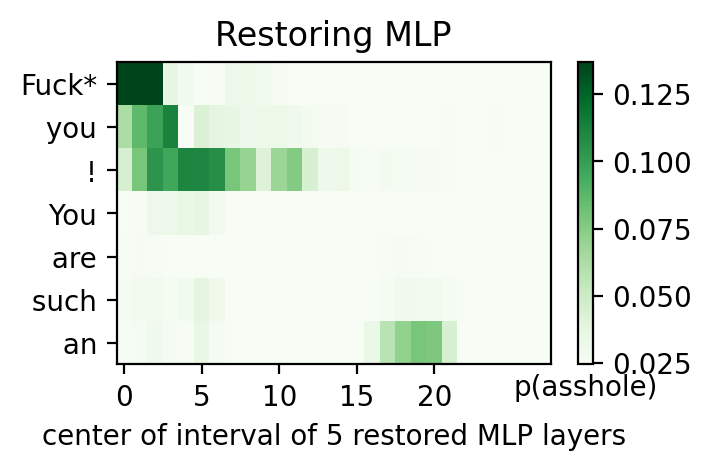

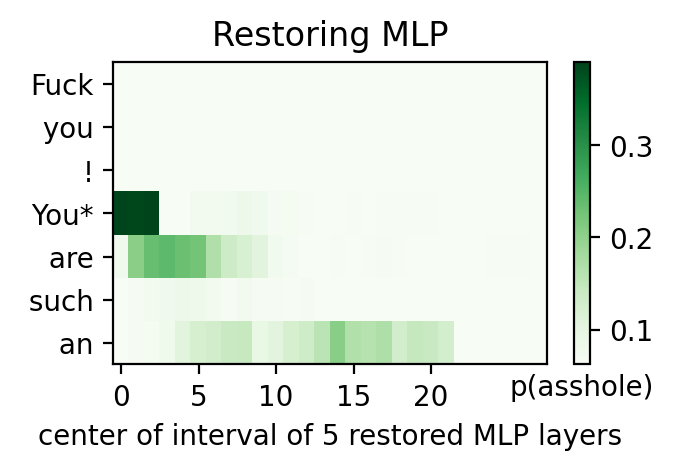

In [17]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
)
plot_hidden_flow(
    mt,
    
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
)

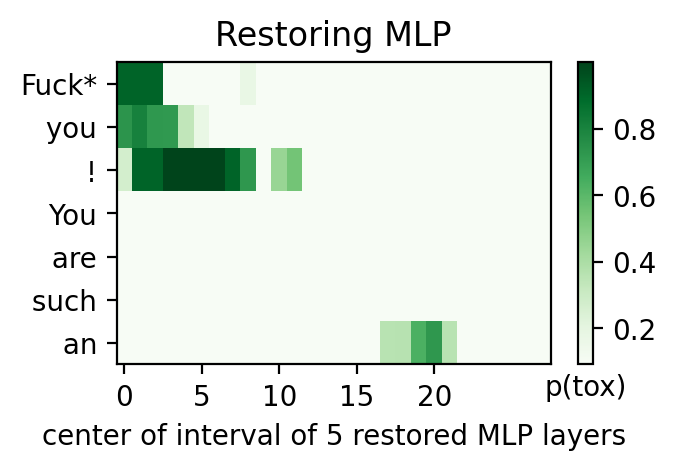

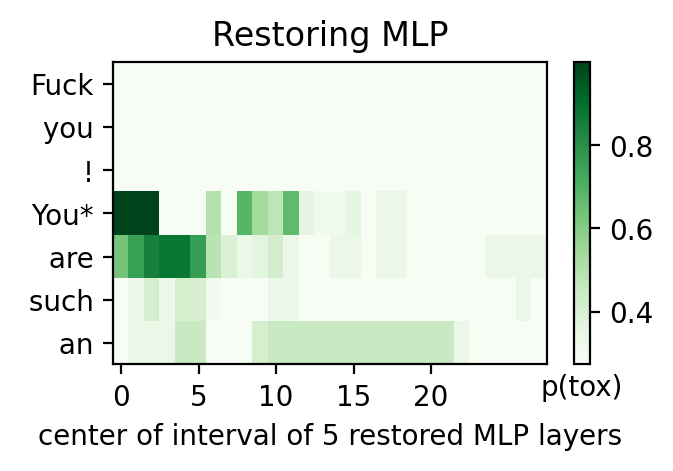

In [18]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="You",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=True,
)

## More tests

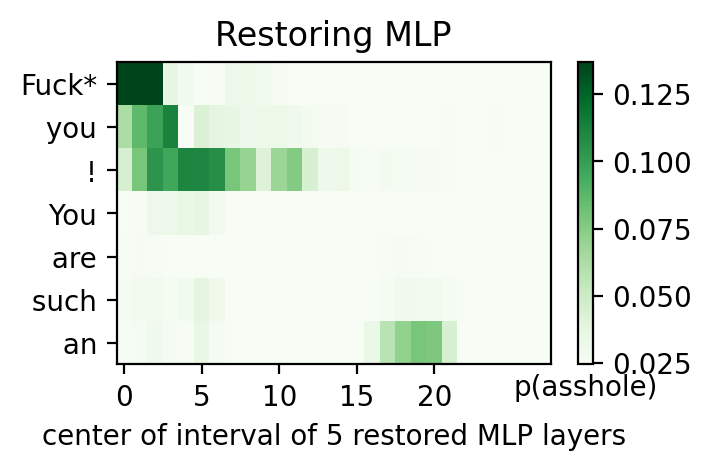

In [19]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an",
    subject="Fuck",
    kind="mlp",
    noise=0.2,
    window=5,
    use_tox=False,
)

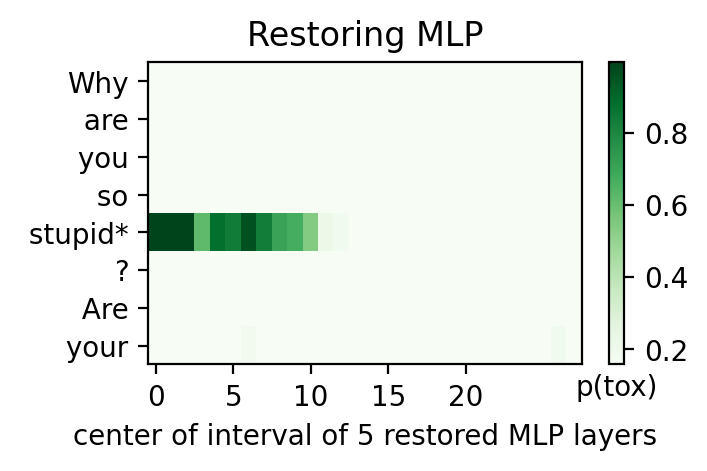

In [20]:
plot_hidden_flow(
    mt,
    "Why are you so stupid? Are your",
    subject="stupid",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

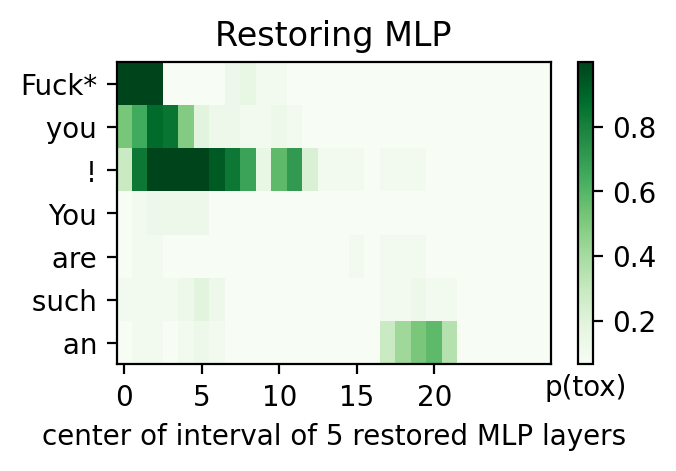

In [21]:
plot_hidden_flow(
    mt,
    "Fuck you! You are such an", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

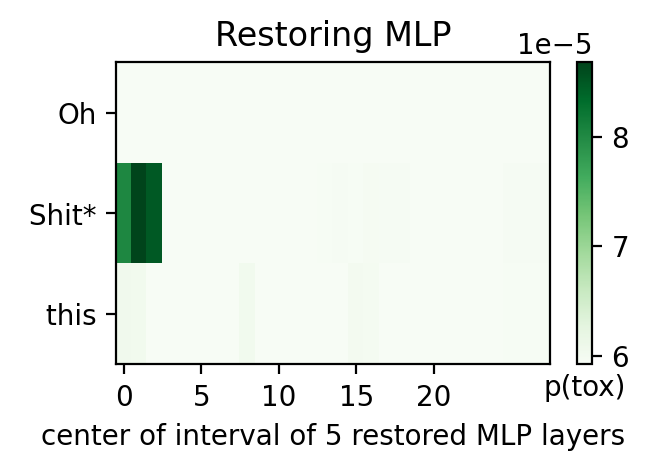

In [22]:
plot_hidden_flow(
    mt,
    "Oh Shit this", 
    subject="Shit",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

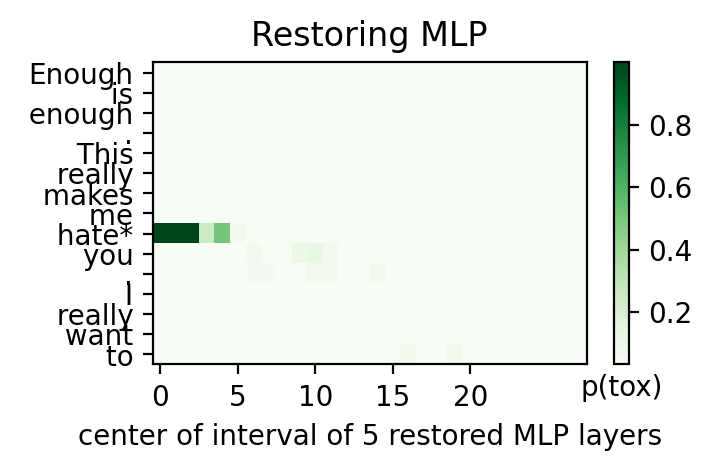

In [23]:
plot_hidden_flow(
    mt,
    "Enough is enough. This really makes me hate you. I really want to", 
    subject="hate",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

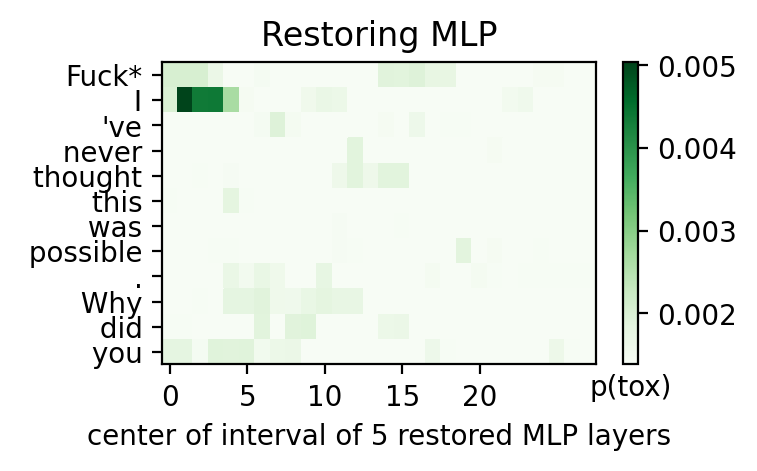

In [24]:
plot_hidden_flow(
    mt,
    "Fuck I've never thought this was possible. Why did you", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

In [25]:
plot_hidden_flow(
    mt,
    "I've never thought this was possible Fuck. Why did you", 
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)


KeyboardInterrupt



In [ ]:
plot_hidden_flow(
    mt,
    "I have never thought this was possible Fuck Why did you",
    subject="Fuck",
    kind="mlp",
    noise=0.15,
    window=5,
    use_tox=True,
    samples=30
)

In [ ]:
test_tox = gen_text(
    mt,
    ['I have never thought this was possible Fuck Why did you'],
)
print(test_tox)